In [1]:
from os.path import abspath, join
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_bar, aes, scale_x_discrete, theme, element_text, labs, \
    scale_x_continuous, scale_y_continuous, geom_line, geom_boxplot, ylim


In [45]:
# SETUP DATA
path = "C:/Users/t-niamit/JavaAnalyzer"
freq_list = "german.csv"
compound_words_list = "german_compound.csv"
df = pd.read_csv(abspath(join(path, freq_list)))
df = df.groupby(["name"]).frequency.sum().reset_index().sort_values("frequency", ascending=False)
compound_words_df = pd.read_csv(abspath(join(path, compound_words_list)))
compound_words_df["compound_word"] = compound_words_df["compound_word"].str.lower()
compound_words_set = set(compound_words_df["compound_word"])


In [53]:
def count_compound_word_parts(compound_word, count=0):
    word = str(compound_word).lower()
    if word is not None and word in compound_words_set:
        return count_compound_word_parts(
            compound_words_df[compound_words_df["compound_word"] == word].remainder.array[0],
            count + 1
        )
    else:
        return count+1


df["Words count"] = df["name"].apply(count_compound_word_parts).astype('category')
print(df.head())

KeyboardInterrupt: 

c:\users\t-niamit\pycharmprojects\pythonproject\venv\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2


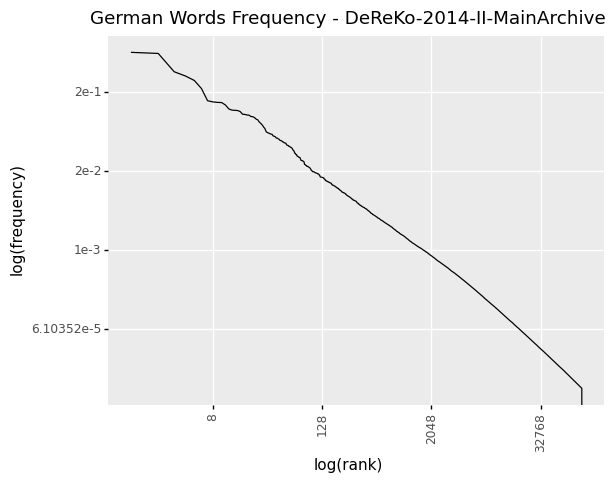

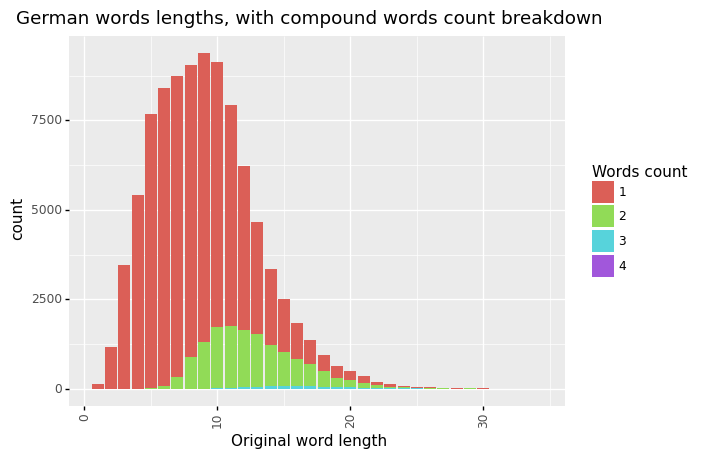

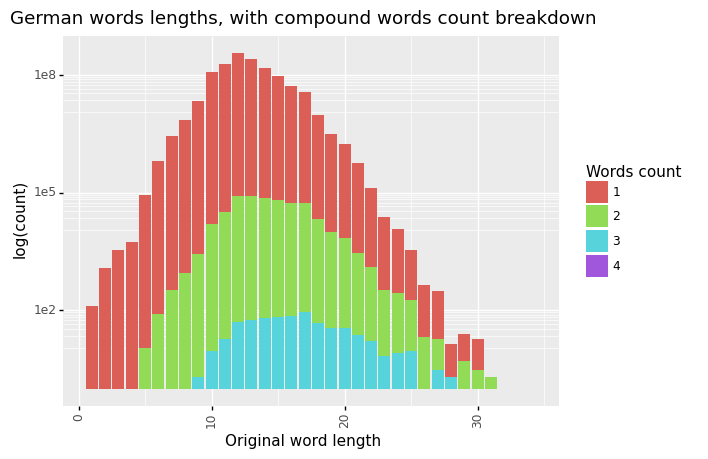

In [52]:
most_freq_word_occurrences = int(df[:1]['frequency'])

df['frequency'] = df['frequency'] / most_freq_word_occurrences
data_length = df.shape[0]
df['rank'] = np.linspace(1, data_length, data_length)

print(ggplot(df)
	  + labs(x="log(rank)",
			 y="log(frequency)",
			 title="German Words Frequency - DeReKo-2014-II-MainArchive")
	  + scale_x_continuous(trans='log2') + scale_y_continuous(trans='log2')
	  + geom_line(aes(x='rank', y='frequency'), stat='identity')
	  + theme(axis_text_x=element_text(rotation=90))
	  )


df["length"] = df['name'].str.len()

print(
	ggplot(df)
	+ labs(x="Original word length",
		   y="count",
		   title="German words lengths, with compound words count breakdown")
	+ geom_bar(aes(x='length', fill="Words count"))
  	# + xlim(0, 35)
	+ theme(axis_text_x=element_text(rotation=90))
)

print(
	ggplot(df)
	+ labs(x="Original word length",
		   y="log(count)",
		   title="German words lengths, with compound words count breakdown")
	+ geom_bar(aes(x='length', fill="Words count"))
	+ scale_y_continuous(trans='log10')
  	# + xlim(0, 35)
	+ theme(axis_text_x=element_text(rotation=90))
)